# Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv(r"C:\Users\ACER\Downloads\digit-recognizer\train.csv")
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Dataset Splitting and Normalization

In [3]:
X = df_train.drop(columns='label').values / 255.0  # Normalizing the data
y = df_train['label']

In [4]:
# Reshape the data to fit the model (28x28x1 for grayscale images)
X = X.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y = to_categorical(y, num_classes=10)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelling

In [6]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Fit the data generator on the training data
datagen.fit(X_train)

In [7]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

D:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the augmented data
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))


Epoch 1/10


D:\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.7903 - loss: 0.6674 - val_accuracy: 0.9811 - val_loss: 0.0721
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.9501 - loss: 0.1704 - val_accuracy: 0.9740 - val_loss: 0.0820
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - accuracy: 0.9663 - loss: 0.1202 - val_accuracy: 0.9756 - val_loss: 0.0953
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.9681 - loss: 0.1129 - val_accuracy: 0.9756 - val_loss: 0.0793
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.9740 - loss: 0.0928 - val_accuracy: 0.9911 - val_loss: 0.0389
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.9741 - loss: 0.0889 - val_accuracy: 0.9868 - val_loss: 0.0480
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.9781 - loss: 0.0776 - val_accuracy: 0.9905 - val_loss: 0.0350
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.9781 - loss: 0.08

# Evaluation

In [9]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Menggunakan Model CNN dengan Augmentasi Data dan Batch Normalization:")
print(f"Akurasi pada data training: {train_accuracy:.4f}")
print(f"Akurasi pada data testing: {test_accuracy:.4f}")

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9930 - loss: 0.0259
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9883 - loss: 0.0531
Menggunakan Model CNN dengan Augmentasi Data dan Batch Normalization:
Akurasi pada data training: 0.9919
Akurasi pada data testing: 0.9885


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


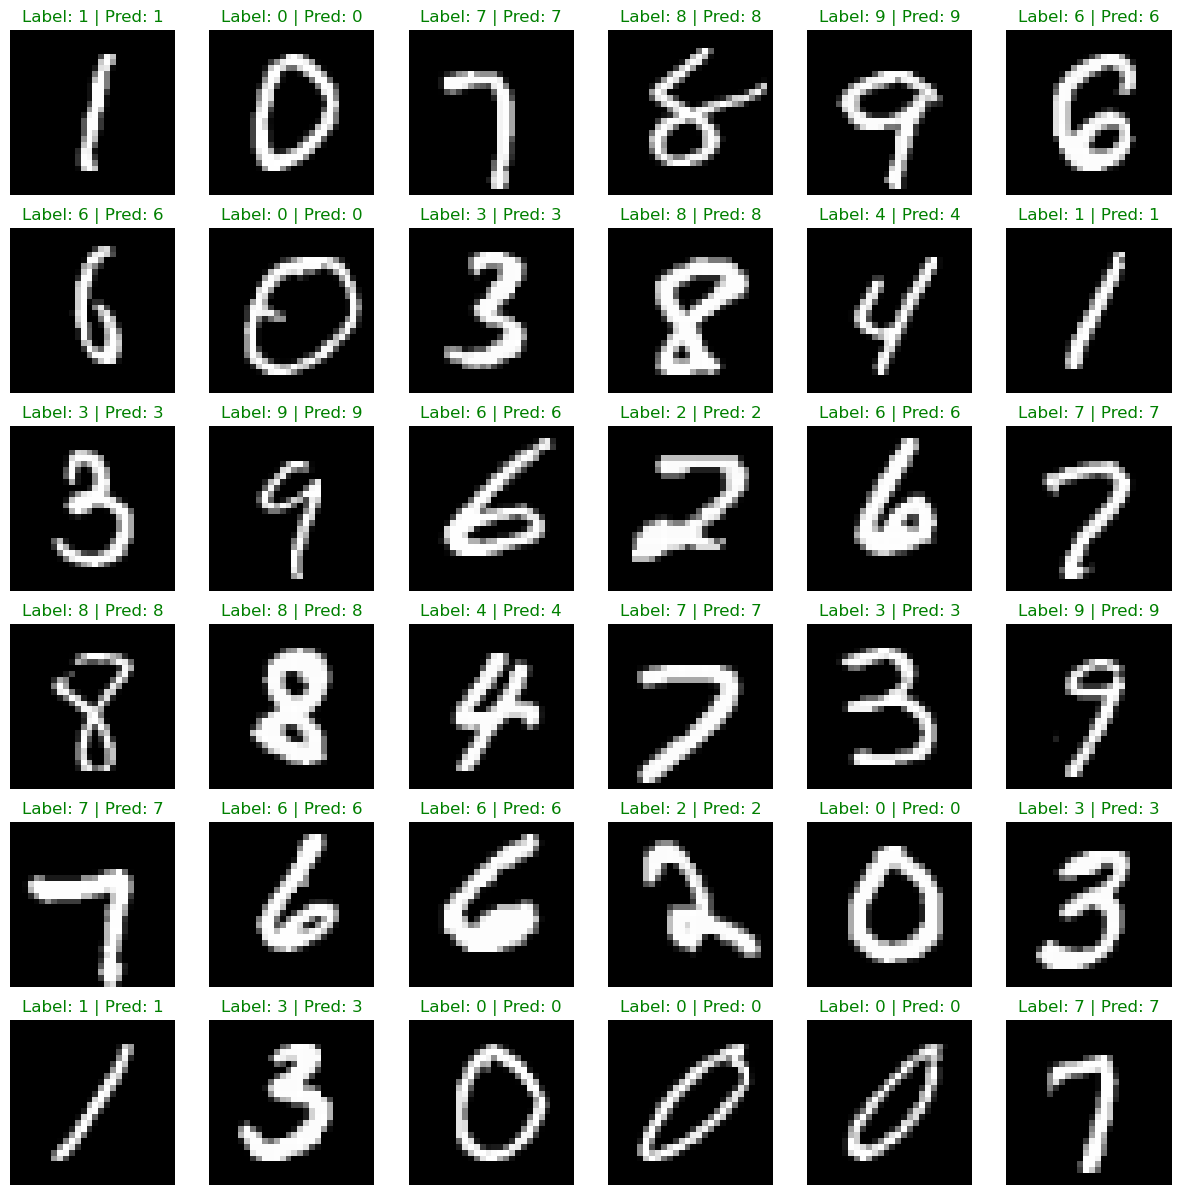

In [10]:
# Visualization: Displays predicted and actual results on testing data
idx = np.random.choice(len(X_test), size=36, replace=False)
images, labels = X_test[idx], y_test[idx]
preds = np.argmax(model.predict(images), axis=1)  # Prediksi dari model
true_labels = np.argmax(labels, axis=1)  # Label asli

fig, axes = plt.subplots(6, 6, figsize=(15, 15))
for img, true_label, pred, ax in zip(images, true_labels, preds, axes.flatten()):
    font = {'color': 'g'} if true_label == pred else {'color': 'r'}
    ax.imshow(img.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {true_label} | Pred: {pred}", fontdict=font)
    ax.axis('off')
plt.show()

# Apply to New Dataset

In [11]:
df_test = pd.read_csv(r"C:\Users\ACER\Downloads\digit-recognizer\test.csv")

X_new_test = df_test.values / 255.0
X_new_test = X_new_test.reshape(-1, 28, 28, 1)

In [12]:
results = model.predict(X_new_test)
results = np.argmax(results, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step


In [13]:
# Create DataFrame for submission
df_results = pd.DataFrame({
    'ImageId': np.arange(1, len(results) + 1),
    'Label': results
})

In [14]:
df_results

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [15]:
# Save the predictions to a CSV file
df_results.to_csv(r"C:\Users\ACER\Downloads\Digit Recognizer CNN Model III.csv", index=False)

print("Predictions saved to 'predictions.csv'.")

Predictions saved to 'predictions.csv'.
